# Crack segmentation data

In [1]:
from datasets.segmentation import CrackSeg


dataset = CrackSeg("data/crack-segmentation/dataset/image", "data/crack-segmentation/dataset/mask")

In [11]:
_, mask, _, _ = dataset[0]
print("image width", mask.shape[2])
print("image height", mask.shape[1])
print("total tiles", len(dataset))

image width 256
image height 256
total tiles 8594


## Global metrics

In [7]:
pixel_density = []
for i in range(len(dataset)):
    _, mask, _, _ = dataset[i]
    mask.shape
    crack_pixels = mask.count_nonzero()
    total_pixels = mask.shape[1] * mask.shape[2]
    crack_percentage = crack_pixels / total_pixels * 100
    pixel_density.append(crack_percentage)

print(sum(pixel_density) / len(pixel_density))
print(min(pixel_density))
print(max(pixel_density))

tensor(3.2113)
tensor(0.)
tensor(41.9754)


Text(0, 0.5, 'Tiles (count)')

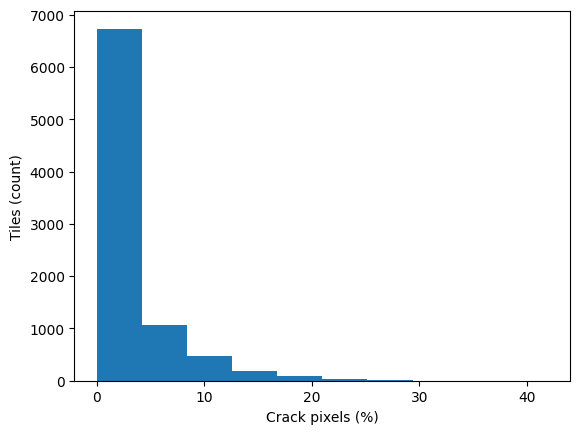

In [ ]:
import matplotlib.pyplot as plt


plt.hist(pixel_density)
plt.xlabel("Crack pixels (%)")
plt.ylabel("Tiles (count)")

In [17]:
from pandas import Series


pixel_density_df = Series(pixel_density)
total_tiny_cracks = len(pixel_density_df[pixel_density_df <= 10])
print("total tiny cracks", total_tiny_cracks)
print("tiny crack percentage", total_tiny_cracks / len(pixel_density))

total tiny cracks 8033
tiny crack percentage 0.9347218989993018


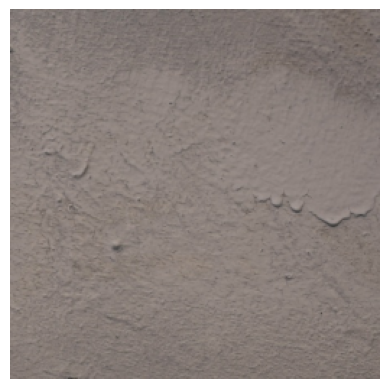

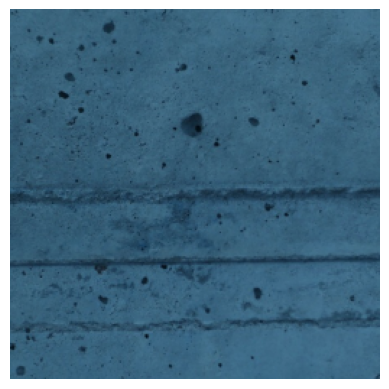

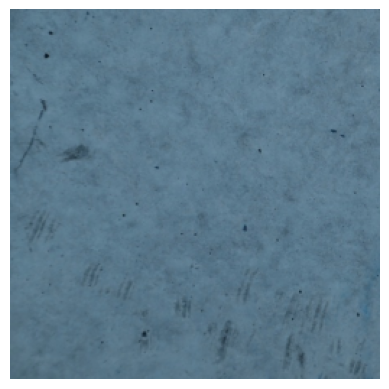

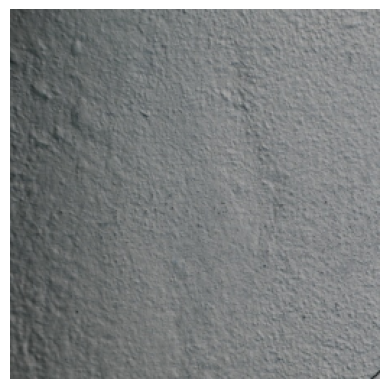

In [ ]:
from train_utils import segmentation


for i in range(len(dataset)):
    _, mask, _, _ = dataset[i]
    mask.shape
    crack_pixels = mask.count_nonzero()
    if crack_pixels == 0:
        segmentation.show_label(dataset, i)

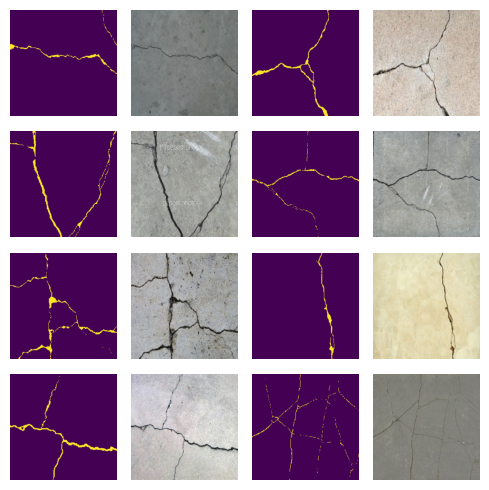

In [27]:
def plot_sample_grid():
    fig, axs = plt.subplots(4, 4, layout='tight')
    fig.set_figwidth(5)
    fig.set_figheight(5)
    image, mask, _, _ = testset[0]
    axs[0][0].imshow(mask.squeeze().cpu())
    axs[0][1].imshow(image.permute((1, 2, 0)).cpu())
    image, mask, _, _ = testset[1]
    axs[0][2].imshow(mask.squeeze().cpu())
    axs[0][3].imshow(image.permute((1, 2, 0)).cpu())
    image, mask, _, _ = testset[2]
    axs[1][0].imshow(mask.squeeze().cpu())
    axs[1][1].imshow(image.permute((1, 2, 0)).cpu())
    image, mask, _, _ = testset[3]
    axs[1][2].imshow(mask.squeeze().cpu())
    axs[1][3].imshow(image.permute((1, 2, 0)).cpu())
    image, mask, _, _ = testset[4]
    axs[2][0].imshow(mask.squeeze().cpu())
    axs[2][1].imshow(image.permute((1, 2, 0)).cpu())
    image, mask, _, _ = testset[8]
    axs[2][2].imshow(mask.squeeze().cpu())
    axs[2][3].imshow(image.permute((1, 2, 0)).cpu())
    image, mask, _, _ = testset[6]
    axs[3][0].imshow(mask.squeeze().cpu())
    axs[3][1].imshow(image.permute((1, 2, 0)).cpu())
    image, mask, _, _ = testset[11]
    axs[3][2].imshow(mask.squeeze().cpu())
    axs[3][3].imshow(image.permute((1, 2, 0)).cpu())
    for row in axs:
        for ax in row:
            ax.set_axis_off()
    fig.show()


testset = CrackSeg("data/crack-segmentation/dataset/val_img", "data/crack-segmentation/dataset/val_msk")
plot_sample_grid()